# Project 2

In this project, you will implement the exploratory analysis plan developed in Project 1. This will lay the groundwork for our our first modeling exercise in Project 3.

### Step 1: Load the python libraries you will need for this project 

In [2]:
#imports
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pylab as pl
import numpy as np
import seaborn as sns # for nice looking plots
import scipy.stats as stats
from pandas.tools.plotting import scatter_matrix
%matplotlib inline

### Step 2: Read in your data set 

In [3]:
#Read in data from source 
df_raw = pd.read_csv("../assets/admissions.csv")
print df_raw.head()

   admit    gre   gpa  prestige
0      0  380.0  3.61       3.0
1      1  660.0  3.67       3.0
2      1  800.0  4.00       1.0
3      1  640.0  3.19       4.0
4      0  520.0  2.93       4.0


## Questions
#### Question 1. How many observations are in our dataset? 


In [4]:
df_raw.count()

admit       400
gre         398
gpa         398
prestige    399
dtype: int64

In [5]:
df_raw.shape

(400, 4)

Answer: There are 400 instances in our dataset. However some of the instances are missing data. admit has 400 observations, gre has 398 observations, gpa has 398 ovservations, and prestige has 399 observations. 

#### Question 2. Create a summary table

In [6]:
#function

In [7]:
df_raw.describe()

,admit,gre,gpa,prestige
count,400.000000,398.000000,398.00000,399.000000
mean,0.317500,588.040201,3.39093,2.486216
std,0.466087,115.628513,0.38063,0.945333
min,0.000000,220.000000,2.26000,1.000000
25%,0.000000,520.000000,3.13000,2.000000
50%,0.000000,580.000000,3.39500,2.000000
75%,1.000000,660.000000,3.67000,3.000000
max,1.000000,800.000000,4.00000,4.000000


#### Question 3. Why would GRE have a larger STD than GPA?

Answer: GRE might have a larger STD than GPA because the two features are measured at signigicantly different scales. GRE ranges from ~300 to 800 and GPA ranges from 0.0 to 4.0

#### Question 4. Drop data points with missing data


In [8]:
df = df_raw.dropna()
df.count()

admit       397
gre         397
gpa         397
prestige    397
dtype: int64

#### Question 5. Confirm that you dropped the correct data. How can you tell? 

In [9]:
df.describe()

,admit,gre,gpa,prestige
count,397.000000,397.000000,397.000000,397.000000
mean,0.317380,587.858942,3.392242,2.488665
std,0.466044,115.717787,0.380208,0.947083
min,0.000000,220.000000,2.260000,1.000000
25%,0.000000,520.000000,3.130000,2.000000
50%,0.000000,580.000000,3.400000,2.000000
75%,1.000000,660.000000,3.670000,3.000000
max,1.000000,800.000000,4.000000,4.000000


Answer: After using .dropna we see that our df.describe shows a total count of 397 compared to the 400 of df_raw. Furthermore, the count is the same across all features whereas in df_raw the count varied.

#### Question 6. Create box plots for GRE and GPA

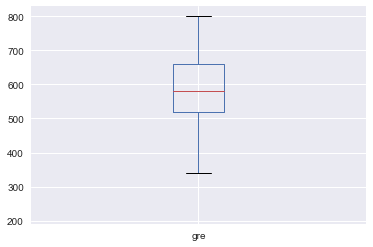

In [10]:
#boxplot 1
df['gre'].plot(kind='box')

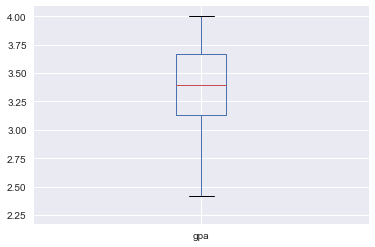

In [11]:
#boxplot 2 
df_raw['gpa'].plot(kind='box')

#### Question 7. What do this plots show?

Answer: Boxplot 1 (GRE) shows us that the median GRE is 580 with 75% of our data below 660 and 25% of our data below 520. The "whiskers" show the max and min values of our non-outlier data points. Finally the plot shows our outliers around 300 and 200.

Boxplot 2 (GPA) show us that the median GPA is 3.4 with 75% of our data below 3.67 and 25% of our date below 3.13. The "whiskers" show the max and min values of our non-outlier data points. Finally the plot shows our outliers around 2.25.

#### Question 8. Describe each distribution 

GRE stats.normaltest p-value = 0.148229806138 /n
GRE Shapiro p-value = 0.000604150292929 /n
GRE Anderson statistic = 0.958335193067 /n
GRE Anderson critical values = [ 0.57   0.65   0.779  0.909  1.081] /n
GRE Anderson significance values = [ 15.   10.    5.    2.5   1. ]


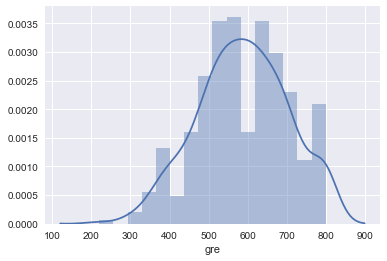

In [31]:
sns.distplot(df['gre'])
z, pval = stats.normaltest(df['gre'])
w, shapiro_p = stats.shapiro(df['gre'])
s, crit_val, sig = stats.anderson(df['gre'], dist='norm')
print "GRE stats.normaltest p-value =", pval,'/n'
print "GRE Shapiro p-value =", shapiro_p, '/n'
print "GRE Anderson statistic =", s, '/n'
print "GRE Anderson critical values =", crit_val, '/n'
print "GRE Anderson significance values =", sig

GPA stats.normaltest p-value = 0.00144457837723 /n
GPA Shapiro p-value = 6.79411732563e-06 /n
GPA Anderson statistic = 1.44109370987 /n
GPA Anderson critical values = [ 0.57   0.65   0.779  0.909  1.081] /n
GPA Anderson significance values = [ 15.   10.    5.    2.5   1. ]


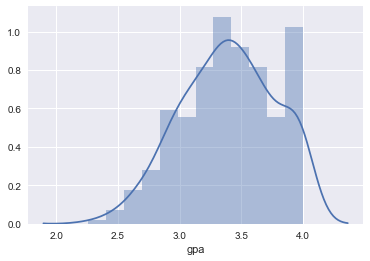

In [36]:
sns.distplot(df['gpa'])
z, pval = stats.normaltest(df['gpa'])
w, shapiro_p = stats.shapiro(df['gpa'])
s, crit_val, sig = stats.anderson(df['gpa'], dist='norm')
print "GPA stats.normaltest p-value =", pval,'/n'
print "GPA Shapiro p-value =", shapiro_p, '/n'
print "GPA Anderson statistic =", s, '/n'
print "GPA Anderson critical values =", crit_val, '/n'
print "GPA Anderson significance values =", sig

ADMIT stats.normaltest p-value = 0.0 /n
ADMIT Shapiro p-value = 1.17646009937e-29 /n
ADMIT Anderson statistic = 83.9328990393 /n
ADMIT Anderson critical values = [ 0.57   0.65   0.779  0.909  1.081] /n
ADMIT Anderson significance values = [ 15.   10.    5.    2.5   1. ]


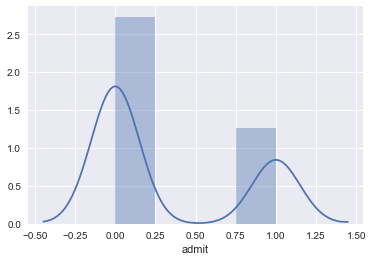

In [37]:
sns.distplot(df['admit'])
z, pval = stats.normaltest(df['admit'])
w, shapiro_p = stats.shapiro(df['admit'])
s, crit_val, sig = stats.anderson(df['admit'], dist='norm')
print "ADMIT stats.normaltest p-value =", pval,'/n'
print "ADMIT Shapiro p-value =", shapiro_p, '/n'
print "ADMIT Anderson statistic =", s, '/n'
print "ADMIT Anderson critical values =", crit_val, '/n'
print "ADMIT Anderson significance values =", sig

PRESTIGE stats.normaltest p-value = 1.85486035562e-11 /n
PRESTIGE Shapiro p-value = 4.13438005782e-17 /n
PRESTIGE Anderson statistic = 19.1505911802 /n
PRESTIGE Anderson critical values = [ 0.57   0.65   0.779  0.909  1.081] /n
PRESTIGE Anderson significance values = [ 15.   10.    5.    2.5   1. ]


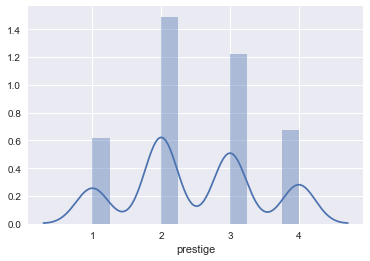

In [38]:
sns.distplot(df['prestige'])
z, pval = stats.normaltest(df['prestige'])
w, shapiro_p = stats.shapiro(df['prestige'])
s, crit_val, sig = stats.anderson(df['prestige'], dist='norm')
print "PRESTIGE stats.normaltest p-value =", pval,'/n'
print "PRESTIGE Shapiro p-value =", shapiro_p, '/n'
print "PRESTIGE Anderson statistic =", s, '/n'
print "PRESTIGE Anderson critical values =", crit_val, '/n'
print "PRESTIGE Anderson significance values =", sig

In [39]:
def qqplot_stats(obs, c):
    z = (obs-np.mean(obs))/np.std(obs)
    stats.probplot(z, dist="norm", plot=plt)
    plt.title("Normal Q-Q plot for " + c)
    plt.show()

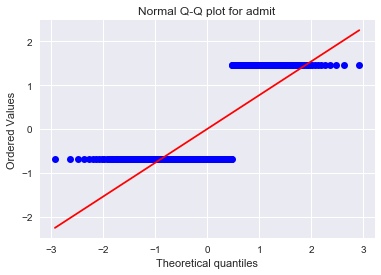

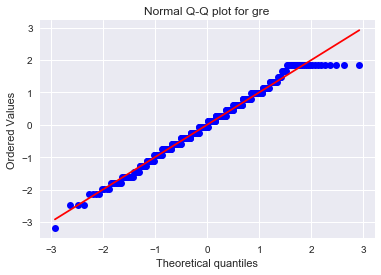

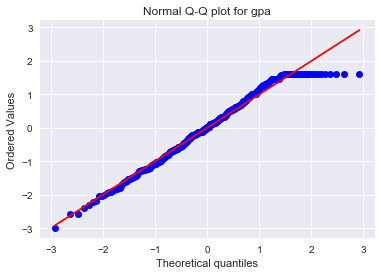

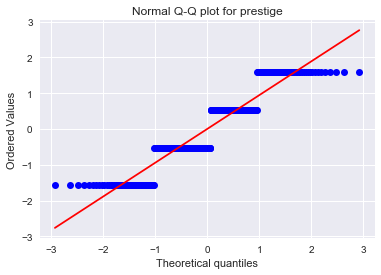

In [40]:
def qqplot_df(df):
    for col in list(df.columns.values):
      qqplot_stats(df[col], col)
qqplot_df(df)

#### Question 9.  If our model had an assumption of a normal distribution would we meet that requirement? 

Answer: According to the scipy stats.normaltest done above, the only feature that qualifies as possibly having a normal distribution is 'GRE'. All other normaltests return a p-value of less than 0.055 indicating that we can be less confident that the dataset is coming from a normal distribution.

The way this is being interpreted is as follows: For this test we are looking to see how different our data distribution is from a normal distribution. Therefor, our null hypothesis is that there is no difference between the two (aka, the dataset is normally distributed). In the cases where our p-value is above 0.055 (standard significance threshold), we have stronger argument to support that our null hypothesis is true and that the tested data is normal. Where the p-value is less than 0.055, we have a stronger argument to reject our null hypothesis, suggesting that out data is not normally distributed.

Conversly, ignoring the stats.normaltest results, but simply looking at the density/histogram plots/qq-plots above it looks like gpa, and gre are normally distributed with some slight skew.

#### Question 10.  Does this distribution need correction? If so, why? How? 

Answer: According to the stats.normaltest, If we are going to be using models that assume normal distribution, then yes the data would need to be corrected. 

Converseley, by looking at the graphs, since gre, gpa appear normal, maybe with a slight skew, then no the data does not need to be corrected 

#### Question 11. Which of our variables are potentially colinear? 

,admit,gre,gpa,prestige
admit,1.000000,0.181202,0.174116,-0.243563
gre,0.181202,1.000000,0.382408,-0.124533
gpa,0.174116,0.382408,1.000000,-0.060976
prestige,-0.243563,-0.124533,-0.060976,1.000000


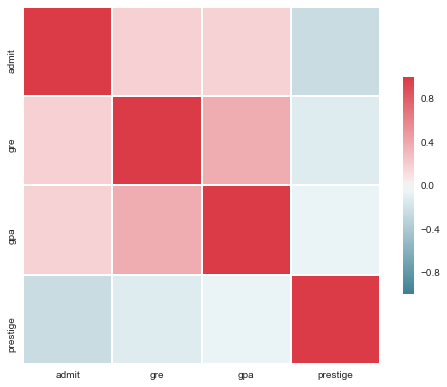

In [205]:
# create a correlation matrix for the data
corr = df.corr()
f, ax = plt.subplots(figsize=(8, 8))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, cmap=cmap, vmax=1.0,
            square=True,linewidths=1, cbar_kws={"shrink": .5}, ax=ax)
corr

#### Question 12. What did you find?

Answer: None of the answers seem to be particullarly colinear. Of all of the features, gpa and gre are the most colinear but even those features aren't very strong.

#### Question 13. Write an analysis plan for exploring the association between grad school admissions rates and prestige of  undergraduate schools.

Answer: I would look to a model that would allow me to predict the liklihood of a student beng admitted based on their gre, gpa, and undergraduate school prestige. Might look something like this...

                P(admit) = b + m1(prestige) + m1(gre) + m2(gpa)

#### Question 14. What is your hypothesis? 

Answer: A student will be more likely admitted to a graduate program if they have a higher gpa, gre, and undergraduate prestige score.

## Bonus/Advanced

#### 1. Bonus: Explore alternatives to dropping obervations with missing data

#### 2. Bonus: Log transform the skewed data

#### 3. Advanced: Impute missing data